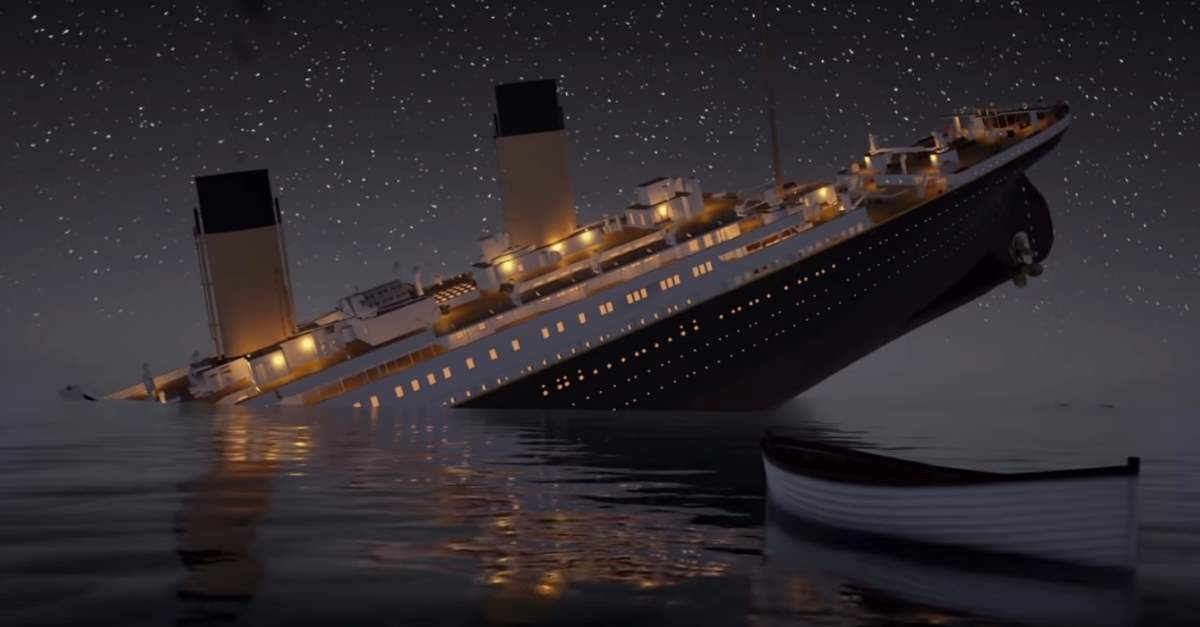**Titanic Dataset.**

**Features**

*   survival - Survival (0 = No; 1 = Yes)
*   class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   name - Name
*   sex - Sex
*   age - Age
*   sibsp - Number of Siblings/Spouses Aboard
*   parch - Number of Parents/Children Aboard
*   ticket - Ticket Number
*   fare - Passenger Fare
*   cabin - Cabin
*   embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)= Southampton) S = Southampton)
Visualizations

# **Import Libraries**

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

# **Extract & Read Data**

In [172]:
def extract(file_path):
    return pd.read_csv(file_path)

In [173]:
#update pipeline to include try block
try:
    #attempt to read in the file
    df = extract('titanic.csv')
#catch the FileNotFoundError
except FileNotFoundError as file_not_found:
    #write an error-level log
    logging.error("{file_not_found} this file doesn't exist")

In [174]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# **Visualisation**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

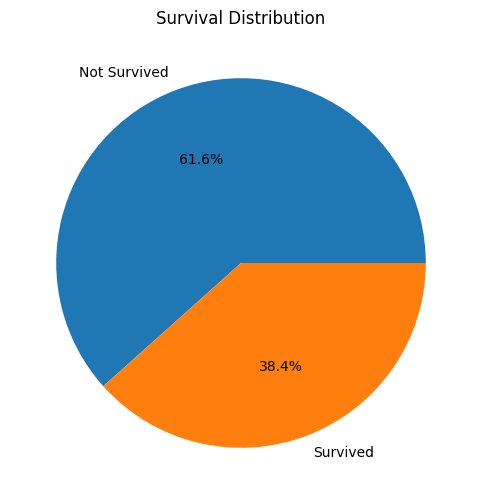

In [177]:
# Assuming 'df' is your DataFrame
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()


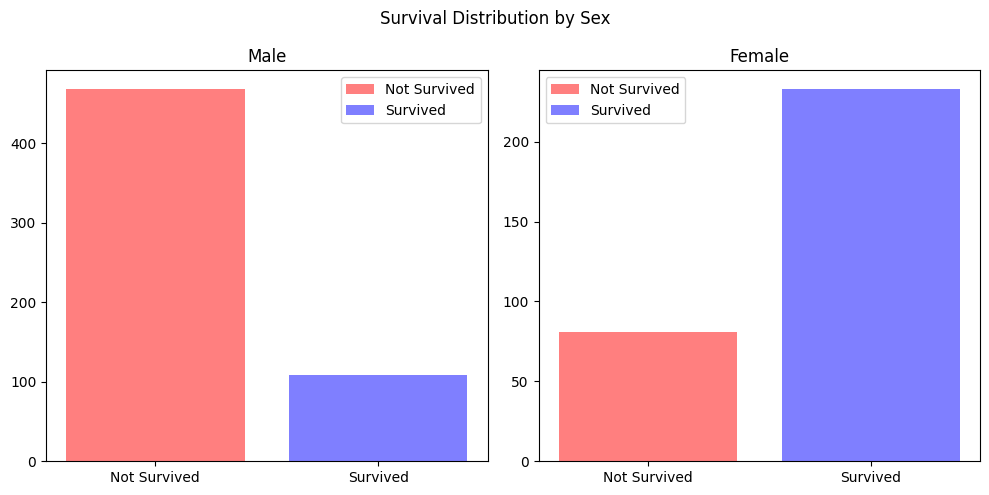

In [178]:
# Group by 'Sex' and 'Survived' and get the size of each group
grouped = df.groupby(['Sex', 'Survived']).size()

# Create a figure with two subplots (one for each sex)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Define the labels for the bars
labels = ['Not Survived', 'Survived']

# Define the colors for the bars
colors = ['red', 'blue']

# Plot data for each sex
for i, sex in enumerate(['male', 'female']):
    # Get data for the current sex
    data = grouped[sex]
    
    # Create an array with the positions of the bars on the x-axis
    x_pos = np.arange(len(labels))
    
    # Plot a bar chart on the current subplot
    bars = axs[i].bar(x_pos, data, align='center', alpha=0.5, color=colors)
    
    # Replace the x ticks with the survival status labels
    axs[i].set_xticks(x_pos)
    axs[i].set_xticklabels(labels)
    
    # Set the title
    axs[i].set_title(sex.capitalize())
    
    # Add a legend
    axs[i].legend(bars, labels)

plt.suptitle('Survival Distribution by Sex')
plt.tight_layout()
plt.show()


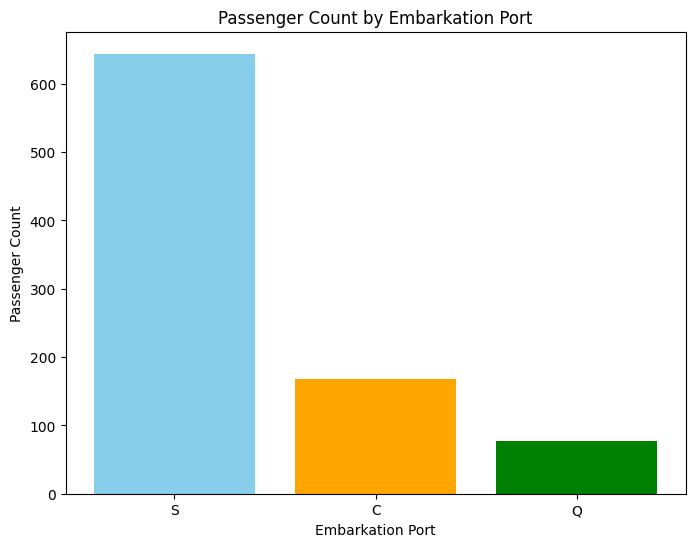

In [179]:
# Get the counts of each unique value in the 'Embarked' column
embarked_counts = df['Embarked'].value_counts()

# Define the colors for the bars
colors = ['skyblue', 'orange','green']

# Create a bar plot
plt.figure(figsize=(8,6))
plt.bar(embarked_counts.index, embarked_counts.values, color=colors)

# Set the title and labels
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')

# Show the plot
plt.show()


# **Preprocessing Data**

In [180]:
# Name and PassengerId are some unimportant columns and hence are dropped
df.drop(['Name','PassengerId','Cabin','Ticket'],axis = 1,inplace = True)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [181]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])


In [182]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [183]:
labelencoder = LabelEncoder()
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

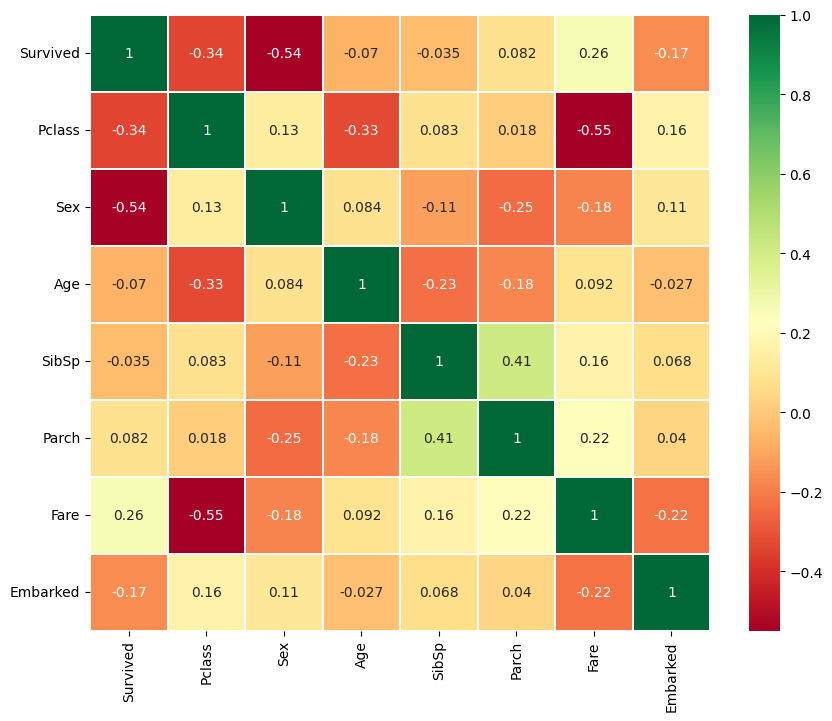

In [184]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# **Splitting Data**

In [185]:
# Define the features for the model
feature = ['Embarked','Fare','Parch','SibSp','Age','Sex','Pclass']
# Define the target variable for the model
target = 'Survived'

In [186]:
# Split the data into training and test sets
X = df[feature]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# Standardize the features
scaler = StandardScaler()
#Fit training data
X_train = scaler.fit_transform(X_train)
#Transform test data
X_test = scaler.transform(X_test)

# **Modeling & Report**

In [188]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gradient Boosting Machine', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{name} Classification Report:\n{report}\n')
    print('!------------------------------------------------!\n')
    

Logistic Regression Accuracy: 81.01%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


!------------------------------------------------!

Decision Tree Accuracy: 78.21%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179


!------------------------------------------------!

Random Forest Accuracy: 82.68%
Random Forest Classification Report:
              precision 